##  Project Phase 2

Submitted by:
- Abdul Rauf 22030015
- Muhammad Waleed 22030017
- Ahmad Aftab 24100251
- Muhammad Osama Faisal 21060008
- Haroon Shahkeel 22100156

##### Problem: 
In this phase of the project, you will be combining all the data generated by each member of
your group and train models to implement the system for authorship attribution (i.e. determining
which of the twitter users scraped by each member of your group are responsible for posting a
given tweet in the test set.



#### Preperation 

Connecting the storage and installing the dependancies

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 5.8 MB 25.5 MB/s 
     |████████████████████████████████| 1.3 MB 44.6 MB/s 
     |████████████████████████████████| 182 kB 55.8 MB/s 
     |████████████████████████████████| 7.6 MB 51.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=902f80b126bb6c52c4074a982c9a1fa669deed7b818c29e96cf83e63f5985fa2
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the modules

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np

# Task 1: Feature Preparation

### Task 1.1: Bag of Word Features

In [ ]:
CSV_FILES = "/content/drive/MyDrive/Project Phase 2/CSV Files" # CSV_FILES of folder containing all the scraped csv file for each member

all_csv = []
tweets_name = [] 
for each_file in os.listdir(CSV_FILES):
  if each_file.endswith("_task2.csv"):
    all_csv.append(CSV_FILES + "/" + each_file)
    tweets_name.append(each_file.split("_")[0])
    print(each_file)

YouTube_task2.csv
nytimes_task2.csv
SouthamptonFC_task2.csv


In [ ]:
# Concatenating all csv file
df = pd.DataFrame()
class_name = []
encoded = []
count = 0
for each_csv in all_csv:
  df = pd.concat(map(pd.read_csv, all_csv), ignore_index=True)
  size = pd.read_csv(each_csv).shape[0]
  for i in range(0, size):
    class_name.append(each_csv.split("/")[-1].split("_")[0])
    encoded.append(count)
  count += 1
df["Class"] = class_name
df["Encoded"] = encoded
#df = df.drop("Unnamed: 0", axis=1)

print("DataFrame Shape:", df.shape)
df.head(-10)

DataFrame Shape: (2766, 3)


,tweets,Class,Encoded
0,case,YouTube,0
1,join next cursed game mario party,YouTube,0
2,first upload every era congratulations reachin...,YouTube,0
3,take notification vacation,YouTube,0
4,creators filming wrong answers,YouTube,0
...,...,...,...
2751,Ready for Sunday Women put in the work on th...,SouthamptonFC,2
2752,ORI ORIOLHappy Birthday,SouthamptonFC,2
2753,Familiar foes Who you got tonight fans,SouthamptonFC,2
2754,in,SouthamptonFC,2


In [ ]:
# Splitting into test and trian

bag_train_x, bag_test_x, bag_train_y, bag_test_y = train_test_split(df["tweets"], df["Encoded"], test_size=0.2)
print("Train shape:", bag_train_x.shape)
print("Test shape:", bag_test_x.shape)

Train shape: (2212,)
Test shape: (554,)


In [ ]:
# making vocabulary by getting unique words in training dataset
def make_vocabulary(df):
    l = []
    for each_tweet in df:
        words = each_tweet.split(" ")
        for each_word in words:
            if each_word not in l:
                l.append(each_word)
    return l
    


In [ ]:
vocab = make_vocabulary(bag_train_x)
print("Vocab:", len(vocab))

Vocab: 7439


In [ ]:
# Creating bag of words for train and test

def make_bag_of_words(vocab, df):
    l = []
    for each_tweet in df:
      tweet_words = each_tweet.split(" ")
      temp = [1] * len(vocab)
      for vocab_word in tweet_words:
        if vocab_word in vocab:
          temp[vocab.index(vocab_word)] = temp[vocab.index(vocab_word)] + 1
      l.append(temp)
    return l


In [ ]:
bag_of_words_train = make_bag_of_words(vocab, bag_train_x)
bag_of_words_test = make_bag_of_words(vocab, bag_test_x)

## Task 1.2: Embeddings


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = df["tweets"]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Sentence: case
Embedding: [ 3.95691395e-03  6.28832281e-02  4.98280898e-02 -4.03783051e-03
  1.40081737e-02 -6.98722452e-02  8.42299312e-02  6.12558089e-02
  6.65461039e-03  6.53790496e-03  3.39023732e-02  3.40333506e-02
  4.91574444e-02 -4.37151827e-03  2.12728847e-02  1.67422332e-02
  2.83565894e-02 -6.02871291e-02 -9.26801711e-02 -2.30197012e-02
 -9.36570764e-02  3.32124867e-02 -3.93001400e-02 -6.00857064e-02
 -5.27667962e-02  9.54748038e-03  2.10704263e-02 -4.10370864e-02
  1.98835637e-02 -5.49345464e-02  1.59998648e-02  2.25604512e-03
  1.65525712e-02 -2.71275938e-02  5.62817231e-02  1.38537567e-02
  7.39324605e-03 -7.13075101e-02  5.46945073e-02 -2.96697952e-02
  4.18300973e-03 -8.12826902e-02  4.41317372e-02  3.47033180e-02
  9.18611698e-03  1.79129988e-02  3.77079472e-02  6.09562285e-02
  4.65682931e-02  1.73641909e-02 -1.50995972e-02 -5.29334806e-02
 -2.66969623e-03  2.41892971e-02  3.82201783e-02  4.96015027e-02
 -2.61166915e-02  8.04416686e-02  4.22627229e-04 -3.74024734e-02

In [ ]:
# Splitting into test and trian
embed_train_x, embed_test_x, embed_train_y, embed_test_y = train_test_split(embeddings, df["Encoded"], test_size=0.2)

print("Train shape:", embed_train_x.shape)
print("Test shape:", embed_test_x.shape)

Train shape: (2212, 384)
Test shape: (554, 384)


In [ ]:
embed_train_x = preprocessing.StandardScaler().fit_transform(embed_train_x)
embed_test_x = preprocessing.StandardScaler().fit_transform(embed_test_x)

# Task 2: KNNs

## Using Task 1.1: Bag of Word Features

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [ ]:
bag_nn = []
bag_acc = []
for i in range(1,10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(neigh, bag_of_words_train, bag_train_y, cv=5, scoring='accuracy')
  bag_nn.append(i)
  bag_acc.append(scores.mean())
  print(f"Accuracy with NN {i}: {scores} Mean: {scores.mean()}")

Accuracy with NN 1: [0.71783296 0.71106095 0.72624434 0.71945701 0.71493213] Mean: 0.7179054778709539
Accuracy with NN 2: [0.73137698 0.72460497 0.74208145 0.73755656 0.73303167] Mean: 0.7337303249134347
Accuracy with NN 3: [0.69074492 0.67945824 0.69230769 0.68778281 0.70361991] Mean: 0.6907827135021399
Accuracy with NN 4: [0.69751693 0.68848758 0.71040724 0.69457014 0.71719457] Mean: 0.7016352920748087
Accuracy with NN 5: [0.67945824 0.6772009  0.68778281 0.67873303 0.69457014] Mean: 0.6835490230125737
Accuracy with NN 6: [0.68171558 0.68171558 0.69230769 0.68099548 0.7081448 ] Mean: 0.6889758230084879
Accuracy with NN 7: [0.67494357 0.67268623 0.68325792 0.67647059 0.69457014] Mean: 0.6803856878747332
Accuracy with NN 8: [0.6772009  0.67268623 0.68778281 0.67873303 0.69909502] Mean: 0.6830995985822703
Accuracy with NN 9: [0.67268623 0.67268623 0.68325792 0.67420814 0.69230769] Mean: 0.6790292432305446


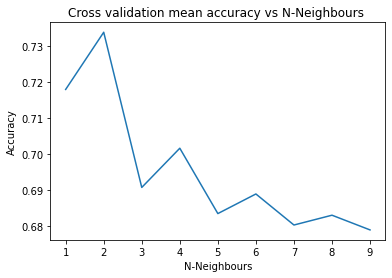

In [ ]:
plt.title("Cross validation mean accuracy vs N-Neighbours ")
plt.xlabel("N-Neighbours")
plt.ylabel("Accuracy")
plt.plot(bag_nn, bag_acc)
plt.show()

               precision    recall  f1-score   support

      YouTube       1.00      1.00      1.00       181
      nytimes       0.98      0.21      0.35       203
SouthamptonFC       0.51      0.99      0.68       170

     accuracy                           0.71       554
    macro avg       0.83      0.74      0.68       554
 weighted avg       0.84      0.71      0.66       554



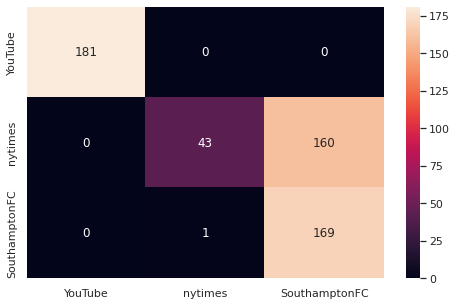

In [ ]:
# prediction on test dataset
best_nn = bag_acc.index(max(bag_acc)) + 1 # using best n-neighbours for test dataset that we got from training dataset
neigh = KNeighborsClassifier(n_neighbors=best_nn).fit(bag_of_words_train, bag_train_y)
y_pred = neigh.predict(bag_of_words_test)
print(metrics.classification_report(bag_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(bag_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12})

## Using Task 1.2: Embeddings


In [ ]:
embed_nn = []
embed_acc = []
for i in range(1,10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(neigh, embed_train_x, embed_train_y, cv=5, scoring='accuracy')
  embed_nn.append(i)
  embed_acc.append(scores.mean())
  print(f"Accuracy with NN {i}: {scores} Mean: {scores.mean()}")

Accuracy with NN 1: [0.88036117 0.89841986 0.92081448 0.87330317 0.88235294] Mean: 0.8910503253220025
Accuracy with NN 2: [0.86455982 0.88487585 0.8959276  0.85067873 0.86199095] Mean: 0.871606590196419
Accuracy with NN 3: [0.89164786 0.89616253 0.92307692 0.8800905  0.87330317] Mean: 0.8928561943964946
Accuracy with NN 4: [0.88939052 0.87358916 0.91855204 0.8800905  0.87556561] Mean: 0.8874375657538585
Accuracy with NN 5: [0.88036117 0.86681716 0.94117647 0.87330317 0.87104072] Mean: 0.8865397383124112
Accuracy with NN 6: [0.87810384 0.86455982 0.92533937 0.88914027 0.87782805] Mean: 0.8869942698385136
Accuracy with NN 7: [0.88487585 0.86907449 0.92760181 0.87104072 0.86651584] Mean: 0.8838217419282351
Accuracy with NN 8: [0.88487585 0.86907449 0.91855204 0.88914027 0.87330317] Mean: 0.8869891627427148
Accuracy with NN 9: [0.88261851 0.86907449 0.91855204 0.8800905  0.86425339] Mean: 0.8829177859718292


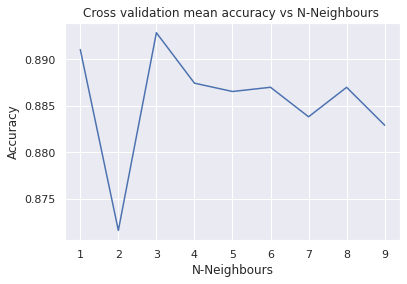

In [ ]:
plt.title("Cross validation mean accuracy vs N-Neighbours ")
plt.xlabel("N-Neighbours")
plt.ylabel("Accuracy")
plt.plot(embed_nn, embed_acc)
plt.show()

               precision    recall  f1-score   support

      YouTube       0.85      0.92      0.88       182
      nytimes       0.99      0.89      0.94       188
SouthamptonFC       0.90      0.92      0.91       184

     accuracy                           0.91       554
    macro avg       0.92      0.91      0.91       554
 weighted avg       0.92      0.91      0.91       554



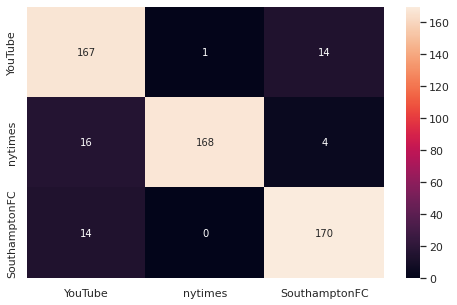

In [ ]:
# prediction on test dataset

best_nn = embed_acc.index(max(embed_acc)) + 1 # using best n-neighbours for test dataset that we got from training dataset
neigh = KNeighborsClassifier(n_neighbors=best_nn).fit(embed_train_x, embed_train_y)
y_pred = neigh.predict(embed_test_x)
print(metrics.classification_report(embed_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(embed_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 10})

# Task 3: NNs


## Using Task 1.1: Bag of Word Features

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(200, 150, 100, 70, 50, 10, ))
scores = cross_val_score(clf, bag_of_words_train, bag_train_y, cv=5, scoring='accuracy')
print(f"Accuracy with 5 folds: {scores} Mean: {scores.mean()}")

Accuracy with 5 folds: [0.84198646 0.35214447 0.85972851 0.35067873 0.81221719] Mean: 0.6433510719794082


<BarContainer object of 5 artists>

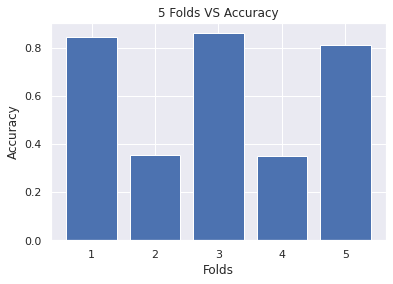

In [ ]:
plt.title("5 Folds VS Accuracy")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
cross = [1,2,3,4,5]
plt.bar(cross, scores)

               precision    recall  f1-score   support

      YouTube       1.00      1.00      1.00       181
      nytimes       0.74      0.84      0.79       203
SouthamptonFC       0.78      0.65      0.71       170

     accuracy                           0.84       554
    macro avg       0.84      0.83      0.83       554
 weighted avg       0.84      0.84      0.83       554



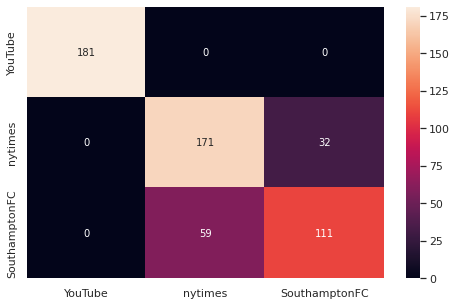

In [ ]:
# prediction on test dataset
clf = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(200, 150, 100, 70, 50, 10, )).fit(bag_of_words_train, bag_train_y)
y_pred = clf.predict(bag_of_words_test)
print(metrics.classification_report(bag_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(bag_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 10})

## Using Task 1.2: Embeddings

In [ ]:
clf = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(30, 20, 10, 5), random_state=1)
scores = cross_val_score(clf, embed_train_x, embed_train_y, cv=5, scoring='accuracy')
print(f"Accuracy with 5 folds: {scores} Mean: {scores.mean()}")

Accuracy with 5 folds: [0.90744921 0.88939052 0.90723982 0.90271493 0.8959276 ] Mean: 0.9005444164121631


<BarContainer object of 5 artists>

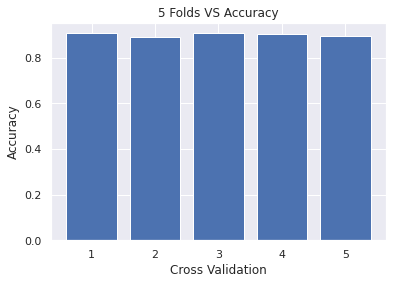

In [ ]:
plt.title("5 Folds VS Accuracy")
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
cross = [1,2,3,4,5]
plt.bar(cross, scores)

               precision    recall  f1-score   support

      YouTube       0.89      0.86      0.87       182
      nytimes       0.94      0.95      0.94       188
SouthamptonFC       0.86      0.89      0.87       184

     accuracy                           0.90       554
    macro avg       0.90      0.90      0.90       554
 weighted avg       0.90      0.90      0.90       554



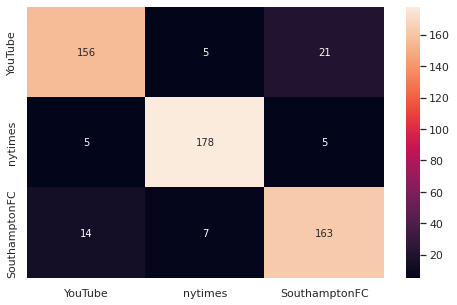

In [ ]:
# prediction on test dataset
clf = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(30, 20, 10, 5), random_state=1).fit(embed_train_x, embed_train_y)
y_pred = clf.predict(embed_test_x)
print(metrics.classification_report(embed_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(embed_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 10})

# Task 4: Ensemble Methods


In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Using Task 1.1: Bag of Word Features


In [ ]:
regressor = RandomForestClassifier(n_estimators = 50, random_state = 0)
score=(cross_val_score(regressor, bag_of_words_train, bag_train_y, cv=5, scoring='accuracy'))
print(f"Scores for each fold are: {score} Mean: {score.mean()}")

Scores for each fold are: [0.93905192 0.96162528 0.96153846 0.97058824 0.97511312] Mean: 0.9615834039814919


<BarContainer object of 5 artists>

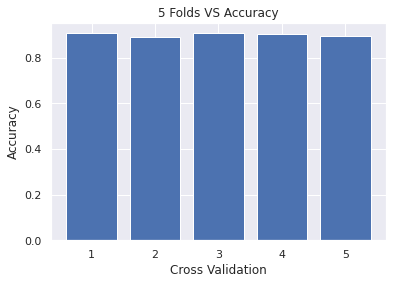

In [ ]:
plt.title("5 Folds VS Accuracy")
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
cross = [1,2,3,4,5]
plt.bar(cross, scores)

               precision    recall  f1-score   support

      YouTube       1.00      1.00      1.00       181
      nytimes       0.99      0.93      0.96       203
SouthamptonFC       0.92      0.99      0.95       170

     accuracy                           0.97       554
    macro avg       0.97      0.97      0.97       554
 weighted avg       0.97      0.97      0.97       554



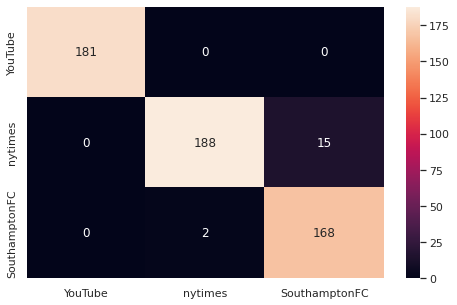

In [ ]:
regressor.fit(bag_of_words_train, bag_train_y)
y_pred = regressor.predict(bag_of_words_test)
print(metrics.classification_report(bag_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(bag_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12})

## Using Task 1.2: Embeddings

In [ ]:
regressor = RandomForestClassifier(n_estimators=300, random_state = 0)
score=(cross_val_score(regressor, embed_train_x, embed_train_y, cv=5, scoring='accuracy'))
print(f"Scores for each fold are: {score} Mean: {score.mean()}")

Scores for each fold are: [0.90519187 0.85553047 0.88687783 0.90497738 0.88687783] Mean: 0.887891075860801


<BarContainer object of 5 artists>

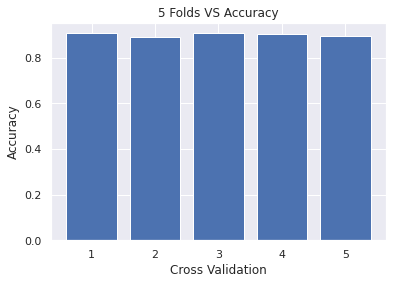

In [ ]:
plt.title("5 Folds VS Accuracy")
plt.xlabel("Cross Validation")
plt.ylabel("Accuracy")
cross = [1,2,3,4,5]
plt.bar(cross, scores)

               precision    recall  f1-score   support

      YouTube       0.92      0.86      0.89       182
      nytimes       0.96      0.94      0.95       188
SouthamptonFC       0.84      0.92      0.88       184

     accuracy                           0.91       554
    macro avg       0.91      0.91      0.91       554
 weighted avg       0.91      0.91      0.91       554



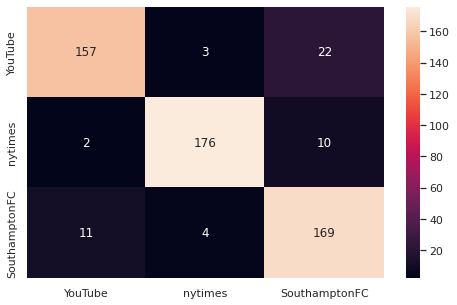

In [ ]:
regressor.fit(embed_train_x, embed_train_y)
y_pred = regressor.predict(embed_test_x)
print(metrics.classification_report(embed_test_y, y_pred, target_names=tweets_name))
confusion_mat = metrics.confusion_matrix(embed_test_y, y_pred)
cm = pd.DataFrame(confusion_mat, index = [i for i in tweets_name], columns = [i for i in tweets_name])
plt.figure(figsize = (8,5))
sn.set(font_scale=1)
sn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12})

## Task 4: Theoretical Understanding

Answer the following questions in a markup cell

Q1: Which model performed best and why do you think that is?

    - The NN performed better overall not by alot that is, the difference is less pronounced due to a realtively small dataset. However with the current dataset and a lot more abilty to manually tune hyperparameters NN performed better. NN usually works better with larger datasets and also requires a lot of tuning for best results

Q2: Which features gave better results for each model? Explain.

    - Embeddings gave much better results for both models. Because embeggings work much better in cases where there is sequence and dependancy in between words and since our tweets were done by humans and were proper sentences rather than random jargan, Embeddings did a really good job compared to BoW which relies on frequencies of words and assumes every word occurs randomly and is independant of others.

Q3: What effect would increasing the classes to 150 have?

    - Assuming dataset would also increase, kNN model would perform better as the boundries would smoothen out. For NN it wouldn't really make much of a difference except probably increase its size.

Q4: Suggest improvements to text preparation, feature extraction, and models that can be made
to perform this task better.

    - As we can see clearly, if there are mulitple tweets each belongs to different categories like two authors tweets about science, five authors tweets about food and 10 author tweets about music, this could greatly affect the overall accuracy of the model. So, if we use 2 models, the first model detects the class of tweet and the second model detects the author among the identified class from model one. This can increase the accuracy overall but we will have to sacrifice over the performance.  

Q5: What - in your understanding - are the applications of authorship attribution?

    - The main application of authorship attribution would be in the feild of law and criminology, where it could be used to identifing meassages from knonw treats and terrorist or the authenticity of a sucide note, It may also be applicable is copyright diputes. Apart from natural language, it could used to identify where malicious code came from incase of hacking or such. Also not to mention is could be used in this very assignment for plagarism detection which you won't find any our assignment :).
